_Einführung in Python, Clemens Brunner, 12.12.2019_

# 10 - Grafiken

In Python gibt es eine große Anzahl an Paketen, welche sich auf das Erstellen von Grafiken spezialisiert haben. Eine grafische Übersicht über dieses Ökosystem sieht man [hier](https://github.com/rougier/python-visualization-landscape):

![](landscape-colors.png)

Die bekanntesten Pakete sind momentan:

- [Matplotlib](http://matplotlib.org/)
- [Bokeh](http://bokeh.pydata.org/en/latest/)
- [Plotly](https://plot.ly/)
- [Seaborn](http://seaborn.pydata.org/)
- [Altair](https://github.com/altair-viz/altair)

Matplotlib ist hier das älteste und bekannteste Paket, es ist aber manchmal relativ umständlich zu bedienen - dafür ist es aber möglich, Grafiken bis ins kleinste Detail anzupassen. Bokeh und Plotly können vor allem interaktive Grafiken für Webanwendungen erstellen. Dies ist sehr praktisch wenn man Daten interaktiv untersuchen möchte. Seaborn und Altair haben sich auf statistische Grafiken spezialisiert. Seaborn baut auf Matplotlib auf und bietet sehr viele zusätzliche statistische Grafiktypen. Altair ist relativ neu und hat sich das Ziel gesetzt, komplexe Grafiken möglichst einfach erstellen zu können.

Neben diesen häufig verwendeten Paketen gibt es noch [plotnine](https://github.com/has2k1/plotnine), welches sehr ähnlich wie [ggplot2](http://ggplot2.org/) für R zu verwenden ist, da es ebenfalls die Grammar of Graphics implementiert. Auf [dieser Seite](http://pythonplot.com/) kann man die Erstellung einiger typischer Grafiken mit den unterschiedlichen Paketen vergleichen.

## Matplotlib
Mit Matplotlib kann man verschiedenste Grafiken vor allem für wissenschaftliche Zwecke erstellen. Meist stehen die darzustellenden Daten als NumPy-Arrays zur Verfügung. Die Verwendung von Matplotlib orientiert sich oberflächlich an MATLAB, d.h. viele Befehle sehen sehr ähnlich aus (zumindest wird meistens das Interface benutzt, welches sich an MATLAB orientiert - grundsätzlich unterscheiden sich die beiden Systeme aber grundlegend voneinander).

Wir beginnen wie immer mit den entsprechenden Import-Befehlen:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In IPython initialisiert man dann zusätzlich den Ausgabemodus mit folgendem Befehl (das ist optional, bewirkt aber, dass ein Grafikfenster den Python-Interpreter nicht blockiert):

In [2]:
%matplotlib

Using matplotlib backend: MacOSX


Wenn man die Plots direkt in der Konsole (d.h. nicht in einem extra Fenster) sehen möchte, kann man stattdessen folgendes eintippen (funktioniert z.B. in Spyder und IPython QtConsole):

In [3]:
%matplotlib inline

### x/y-Plots
Eine der wichtigsten Funktionen in Matplotlib ist `plot`. Eine einfache Liniengrafik erhält man damit wie folgt:

[10 20 30 40 50 60 70 80 90]


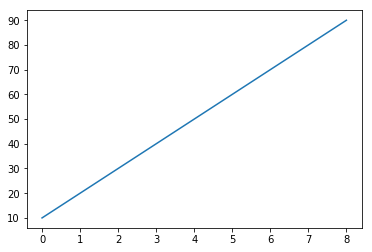

In [4]:
y = np.arange(10, 100, 10)
print(y)
plt.plot(y)

Man kann diese Daten auch als Punktgrafik plotten und muss hier nur entsprechende Argumente übergeben. Im Beispiel unten wird als Format-Argument ein `"x"` übergeben, was die Darstellung der Daten dementsprechend verändert. In diesem Format-String kann man sowohl die Symbole als auch die Farben ändern. In der [Dokumentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) gibt es eine Übersicht aller möglichen Werte.

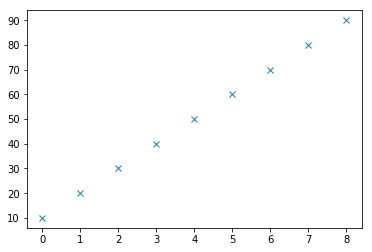

In [5]:
plt.plot(y, "x")

In den vorigen Plots wurde die x-Achse automatisch erstellt - man kann diese aber auch explizit angeben und so einen Scatterplot erstellen.

In [6]:
x = np.random.random(100)
y = x + np.random.random(100)

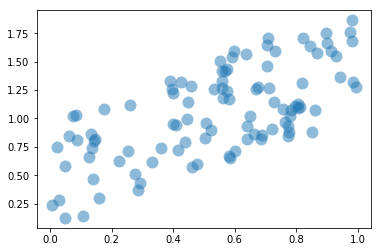

In [7]:
plt.plot(x, y, "o", alpha=0.5, markeredgecolor="None", markersize=12)

Man kann auch mehrere Datenreihen gleichzeitig darstellen indem man mehrere x/y-Paare als Argumente angibt.

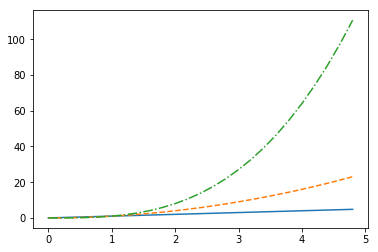

In [8]:
t = np.arange(0, 5, 0.2)
plt.plot(t, t, t, t**2, "--", t, t**3, "-.")

### Subplots
Man kann auch mehrere Subplots in einer Figure erstellen. Genau wie MATLAB hat auch Matplotlib das Konzept einer Figure sowie einer Achse. Eine Figure ist der Gesamtbereich in dem Grafiken erzeugt werden können. Diese kann aus einer oder mehreren Achsen bestehen, sie ist also ein Container für Achsen. Gezeichnet wird immer in einer Achse, und Plot-Befehle beziehen sich standardmäßig auf die aktuelle Achse. Indem man in einer Figure mehrere Achsen erstellt, kann man so mehrere Plots gleichzeitig darstellen.

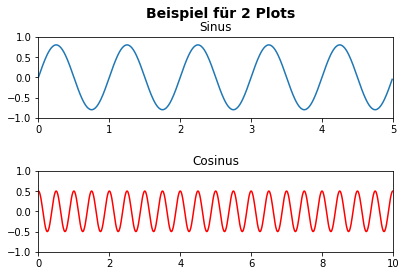

In [9]:
plt.figure(1)
plt.subplot(2, 1, 1)
t = np.arange(0, 5, 0.01)
plt.plot(t, 0.8*np.sin(2*np.pi*t))
plt.axis([0, 5, -1, 1])
plt.title("Sinus")

plt.subplot(2, 1, 2)
t = np.arange(0, 10, 0.01)
plt.plot(t, 0.5*np.cos(4*np.pi*t), "r")
plt.axis([0, 10, -1, 1])
plt.title("Cosinus")

plt.suptitle("Beispiel für 2 Plots", x=0.54, fontsize=14, fontweight="bold")  # Gesamttitel für mehrere Plots
plt.tight_layout(pad=2)

Im obigen Beispiel wird mit `plt.figure(1)` eine Figure mit der Nummer 1 erzeugt. Danach werden mit `plt.subplot(2, 1, 1)` neue Achsen erzeugt. Die Argumente `2, 1, 1` bedeuten, dass die Figure zwei Achsen in 2 Zeilen und 1 Spalte haben soll. Die erste Achse wird dann aktiviert (d.h. alle Plot-Befehle beziehen sich auf diese Achse).

Das Befehl `plt.axis` ändert die Skalierung der aktuellen Achsen; hier gibt man die Werte für `xmin`, `xmax`, `ymin` und `ymax` in einer Liste an.

Der Befehl `plt.title` fügt der aktuellen Achse einen Titel hinzu. Mit `plt.xlabel` bzw. `plt.ylabel` könnte man noch Beschriftungen für die x- bzw. y-Achsen hinzufügen.

Will man eine Figure mit mehreren Achsen mit einem Titel versehen, verwendet man die Funktion `plt.suptitle` (im Beispiel oben werden zusätzlich einige Defaultwerte überschrieben).

Schließlich kann man mit dem Befehl `tight_layout` noch die Abstände zwischen den Subplots optimieren.

### Histogramme
Mit der Funktion `plt.hist` kann man Histogramme erstellen.

(array([1.400e+01, 1.320e+02, 8.980e+02, 2.597e+03, 3.504e+03, 2.092e+03,
        6.600e+02, 9.700e+01, 5.000e+00, 1.000e+00]),
 array([ 41.72634301,  55.02915223,  68.33196145,  81.63477068,
         94.9375799 , 108.24038912, 121.54319835, 134.84600757,
        148.14881679, 161.45162602, 174.75443524]),
 <a list of 10 Patch objects>)

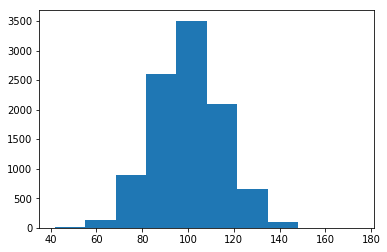

In [10]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
plt.hist(x)

Text(0.5, 1.0, 'Histogramm')

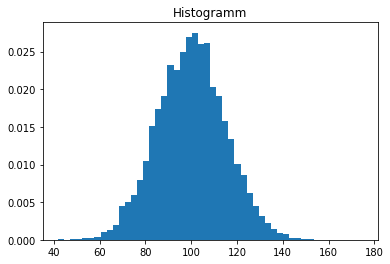

In [11]:
plt.hist(x, bins=50, density=True)
plt.title("Histogramm")

### Balkengrafiken
Ein [Beispiel](http://matplotlib.org/examples/pylab_examples/barchart_demo.html) aus der Dokumentation demonstriert, wie man eine Balkengrafik erstellen kann.

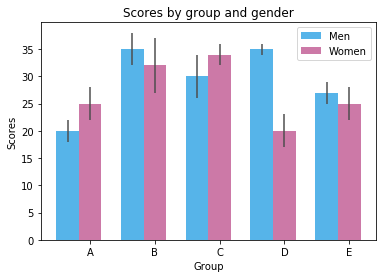

In [12]:
n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

index = np.arange(n_groups)
bar_width = 0.35

plt.bar(index, means_men, bar_width,
        color="#56B4E9",
        yerr=std_men,
        error_kw={"ecolor": "0.3"},
        label="Men")

_ = plt.bar(index + bar_width, means_women, bar_width,
            color="#CC79A7",
            yerr=std_women,
            error_kw={"ecolor": "0.3"},
            label="Women")

plt.xlabel("Group")
plt.ylabel("Scores")
plt.title("Scores by group and gender")
plt.xticks(index + bar_width, ("A", "B", "C", "D", "E"))
_ = plt.legend()

Dieselben Daten können auch als gestapelte Balkengrafik dargestellt werden.

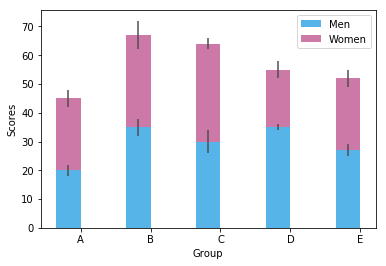

In [13]:
plt.bar(index, means_men, bar_width,
        color="#56B4E9",
        yerr=std_men,
        error_kw={"ecolor": "0.3"},
        label="Men")
plt.bar(index, means_women, bar_width,
        bottom=means_men,
        color="#CC79A7",
        yerr=std_women,
        error_kw={"ecolor": "0.3"},
        label="Women")
plt.xlabel("Group")
plt.ylabel("Scores")
plt.xticks(index + bar_width/2, ("A", "B", "C", "D", "E"))
plt.legend().get_frame().set_facecolor("white")  # weißer Hintergrund in Legende

Man sieht, dass für die Erstellung einer relativ gängigen statistischen Grafik schon einiger Aufwand betrieben werden muss. Daher würde man solche Grafiken eher nicht direkt mit Matplotlib erstellen, sondern beispielsweise mit dem Paket Seaborn.

## Seaborn
Wie bereits erwähnt baut Seaborn auf Matplotlib auf und fügt einige sehr nützliche Grafiktypen hinzu. Man importiert das Paket wie folgt:

In [14]:
import seaborn as sns

Es folgen nun einige Beispiele aus der Seaborn-Dokumentation, welche die Leistungsfähigkeit des Pakets demonstrieren sollen. Anzumerken ist noch, dass Seaborn besonders gut mit Pandas zusammenarbeitet - d.h. wenn die Daten in einem Pandas DataFrame vorhanden sind, kann man die meisten Seaborn-Befehle direkt darauf anwenden. Eine kurze Einführung zu Pandas folgt in der nächsten Einheit.

### Verteilungen

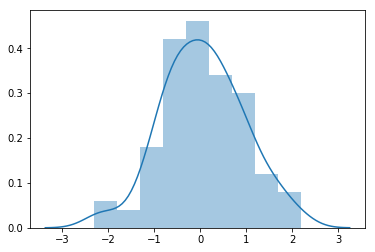

In [15]:
np.random.seed(1)
x = np.random.normal(size=100)
sns.distplot(x)

### Paarweise Beziehungen

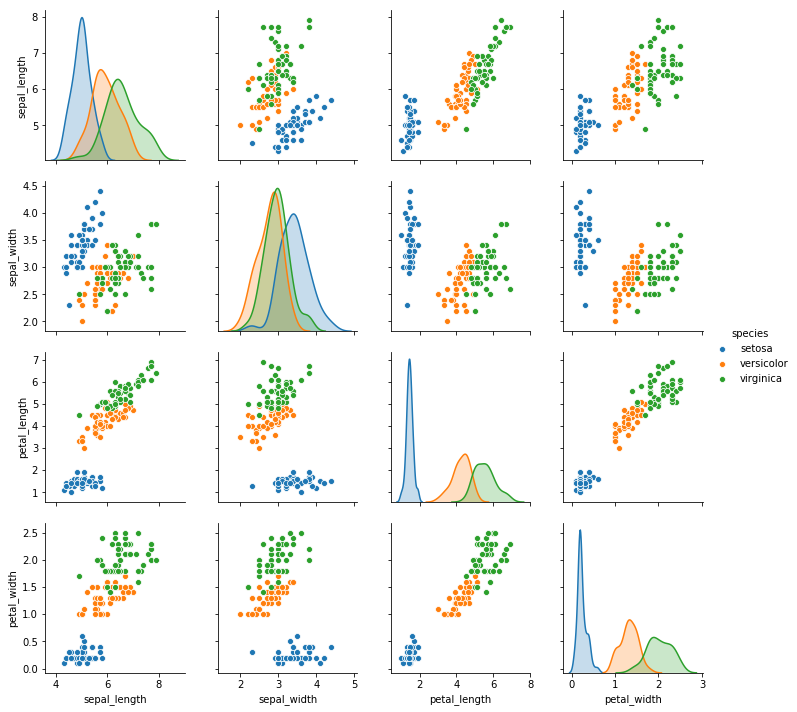

In [16]:
iris = sns.load_dataset("iris")  # iris ist ein Pandas DataFrame
sns.pairplot(iris, hue="species")

### Lineare Regression

In [17]:
tips = sns.load_dataset("tips")  # tips ist ein Pandas DataFrame

Die Daten in `tips` liegen als Pandas DataFrame vor. Dies kann man sich wie ein zweidimensionales NumPy-Array vorstellen (also eine Tabelle bestehend aus Zeilen und Spalten). Die Spalten können Namen haben, diese können als Strings den meisten Seaborn-Funktionen übergeben werden. So sehen die ersten paar Zeilen dieses Data Frames aus:

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Erstellen wir nun einen Scatterplot mit überlagerter Regressionsgerade. Dazu verwenden wir die Funktion `sns.regplot`. Nachdem die Daten in einem Pandas DataFrame vorhanden sind, können wir direkt die Spaltennamen als Argumente für die darzustellenden Daten auf der x- bzw. y-Achse übergeben:

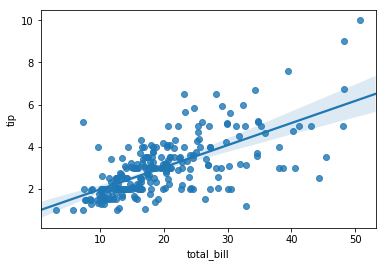

In [19]:
sns.regplot(x="total_bill", y="tip", data=tips)

Man kann für die beiden Argumente `x` und `y` aber auch NumPy-Arrays übergeben (dann benötigt man auch das Argument `data` nicht).

### Balkengrafiken

Sehr ähnlich kann man mit `sns.barplot` eine Balkengrafik erzeugen. Zusätzlich zu den Argumenten `x` und `y` setzen wir noch die Farbe mit dem Argument `hue` - diese Farbe soll aus der Spalte `sex` abgeleitet werden.

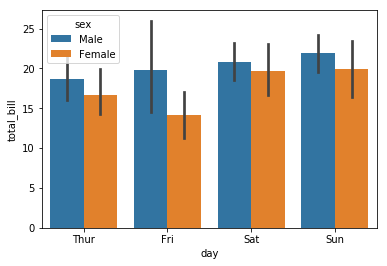

In [20]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

## Hausübung
Geben Sie diese Hausübung als Python-Script in Moodle ab. Verwenden Sie für den Namen Ihrer Datei bitte folgendes Schema:

*Nachname1*_*Nachname2*-HUE10.py

### Übung 1
Lesen Sie die Daten in der Datei `airquality.csv` mit folgendem Code in ein NumPy-Array namens `air` ein (beachten Sie, dass sich die Datei im Arbeitsverzeichnis befinden muss):

```Python
import numpy as np
air = np.genfromtxt("airquality.csv", delimiter=",", skip_header=1)
```

Mit welchem Befehl können Sie die Anzahl der Zeilen und Spalten von `air` herausfinden?

*(2 Punkte)*


### Übung 2
Die Spalten in `air` beinhalten folgende Variablen: `Ozone`, `Solar.R`, `Wind`, `Temp`, `Month` und `Day`. Erstellen Sie mit Matplotlib ein Histogramm der Wind-Werte.

*(2 Punkte)*

### Übung 3
Erstellen Sie ein Histogramm mit überlagerter geschätzter Verteilungsfunktion der Wind-Werte. Verwenden Sie dazu die entsprechende Funktion aus dem Paket Seaborn.

*(2 Punkte)*

### Übung 4
Erstellen Sie mit Matplotlib einen Scatterplot mit der Temperatur auf der x-Achse und dem Wind auf der y-Achse.

*(2 Punkte)*

### Übung 5
Erstellen Sie mit Seaborn denselben Scatterplot wie in Übung 4 (Temperatur vs. Wind), aber überlagern Sie zusätzlich eine Regressionsgerade inklusive Konfidenzintervall.

*(2 Punkte)*

---
![](cc_license.png)

Diese Unterlagen sind lizenziert unter einer [Creative Commons Namensnennung - Nicht-kommerziell - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz](http://creativecommons.org/licenses/by-nc-sa/4.0/).